# Simple Linear Regression

### Agenda

In this lab we will  apply linear regression modules using the Python scikit-learn package. In particularly;

1. Understand the basics of applying regression models for prediction.
2. Evaluate the performance of regression models.
2. Apply a recipe for using scikit-learn to define, train and test machine learning models.
Overvie

### Introduction


Linear regression is a prediction method that is more than 200 years old. Simple linear regression is a great first machine learning algorithm to implement as it requires you to estimate properties from your training dataset.

Linear regression assumes a linear or straight line relationship between the input variables (X) and the single output variable (y). More specifically, that output (y) can be calculated from a linear combination of the input variables (X). When there is a single input variable, the method is referred to as a simple linear regression.In simple linear regression we can use statistics on the training data to estimate the coefficients required by the model to make predictions on new data.

The line for a simple linear regression model can be written as:
    
    y = b0 + b1 * x
    
where b0 and b1 are the coefficients we must estimate from the training data.

Once the coefficients are known, we can use this equation to estimate output values for y given new input examples of x.

When we have a single input attribute (x) and we want to use linear regression, this is called
simple linear regression. If we had multiple input attributes (e.g. X1, X2, X3, etc.) This would be called multiple linear regression. The procedure for linear regression is different and simpler
than that for multiple linear regression.

With simple linear regression we want to model our data as follows:
 y = B0 + B1 × x

This is a line where y is the output variable we want to predict, x is the input variable
we know and B0 and B1 are coefficients that we need to estimate that move the line around.
Technically, B0 is called the intercept because it determines where the line intercepts the y-axis.
In machine learning we can call this the bias, because it is added to offset all predictions that
we make. The B1 term is called the slope because it defines the slope of the line or how x
translates into a y value before we add our bias.

The goal is to find the best estimates for the coefficients to minimize the errors in predicting
y from x. Simple regression is great, because rather than having to search for values by trial
and error or calculate them analytically using more advanced linear algebra, we can estimate
them directly from our data. We can start off by estimating the value for B1 as

![beta1.png](attachment:beta1.png)

![beta11.png](attachment:beta11.png)

Where mean() is the average value for the variable in our dataset. The x i and y i refer to
the fact that we need to repeat these calculations across all values in our dataset and i refers to
the i’th value of x or y. We can calculate B0 using B1 and some statistics from our dataset, as
follows:
                     B0 = mean(y) − B1 × mean(x)

Calculate the B0 and B1 , then predict the yi using the given equation.

We can calculate an error score for our predictions called the Root Mean Squared Error or
RMSE.

![rmse.png](attachment:rmse.png)


## Analysis of the dataset

The dataset selected contains the height and weight of 5000 males and 5000 females.

### Importing the dataset


In [3]:
#Loading the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pip install scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [81]:

# read the csv file
df = pd.read_csv('weight-height.csv')

# print the first 5 rows of the data set
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
#check the total rows and columns in the dataset
df.shape

(10000, 3)

In [6]:
# data type of each column
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

#Data cleaning

**Checking missing values**

In [7]:
# number of null values and other information in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [8]:
#checking total np.nan values
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

Observations
1. There is no missing values in dataset

**Checking duplicates in dataset**

In [9]:
#Checking shape
df.shape

(10000, 3)

In [10]:
#Dropping duplicates
df.drop_duplicates(keep="first",inplace=True)

In [11]:
#Checking shape again
df.shape

(10000, 3)

Observations :
1. There is no duplicates in the dataset as shape of the data is not changed

#Analyzing categorical column "Gender"

In [12]:
# number of unique values of column Gender
df.Gender.nunique()

2

In [13]:
# unique values of column Gender
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [14]:
# Checking Gender dribution
df["Gender"].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

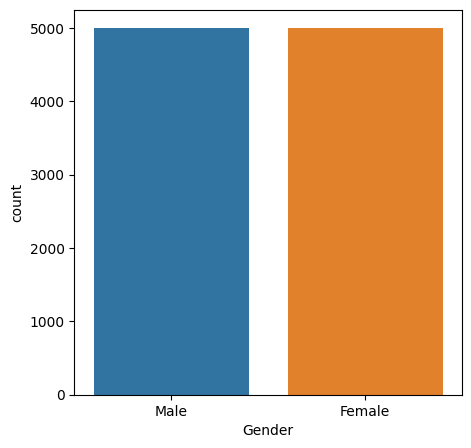

In [15]:
#Visualiing
plt.figure(figsize=(5,5))
sns.countplot(x=df["Gender"])
plt.show()

Observations:
1. As we can easily observe, the dataframe contains three columns: Gender, Height, and Weight.
2. The Gender column contains two unique values of type object: male or female.
3. Above plot can tell us that the data distribution b/w genders are equal.

### Analyzing Height & Weight column

Text(0, 0.5, 'Frequency')

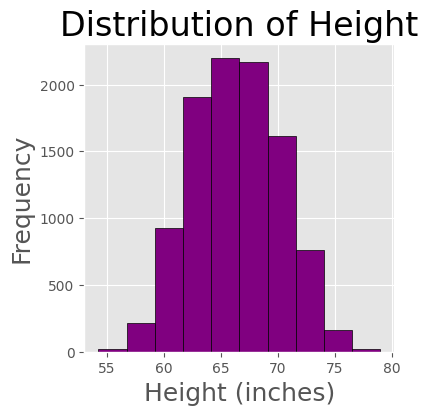

In [16]:
plt.style.use('ggplot')
# histogram of the height
df.Height.plot(kind='hist', color='purple', edgecolor='black', figsize=(4,4))
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18)

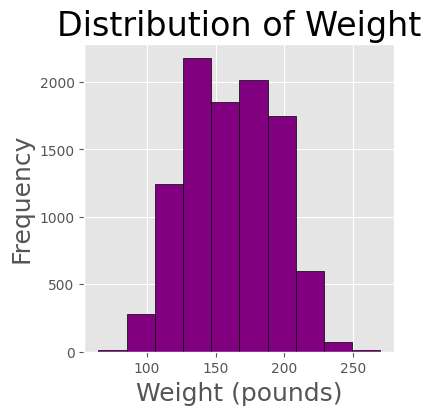

In [17]:
# histogram of the weight
df.Weight.plot(kind='hist', color='purple', edgecolor='black', figsize=(4,4))
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);

<Axes: >

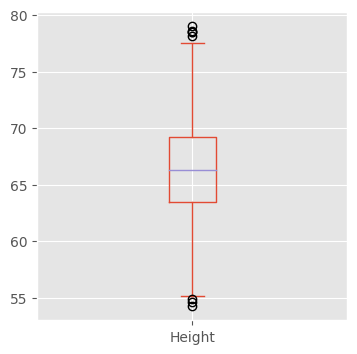

In [18]:
#Box plot for height columns
plt.style.use('ggplot')
# Boxplot of the height
df.Height.plot(kind='box', figsize=(4,4))


<Axes: >

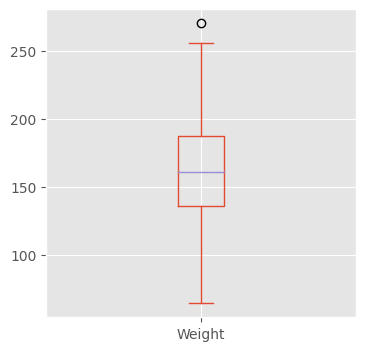

In [19]:
#Box plot for weight columns
plt.style.use('ggplot')
# Boxplot of the weight
df.Weight.plot(kind='box', figsize=(4,4))

Observations:
1. The previous plots depict that both variables Height and Weight present a normal distribution. No lets plot the distribution of males and females in separated histograms.
2. And also not much extreme values in dataset

###Ananlyzing height column for each gender

In [20]:
#Checking avg. height for each gender
print(df[df['Gender'] == 'Male'].Height.mean())
print(df[df['Gender'] == 'Female'].Height.mean())

69.02634590621741
63.70877360342507


Text(0, 0.5, 'Frequency')

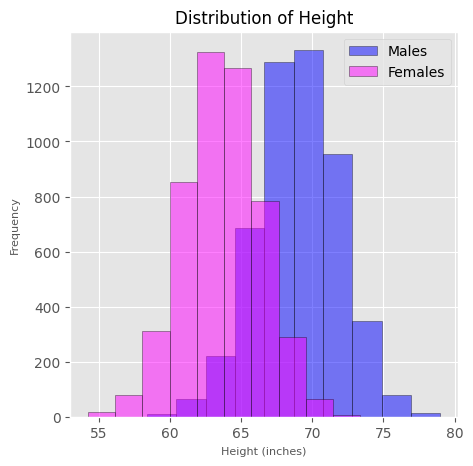

In [21]:
# histogram of the height - males and females
df[df['Gender'] == 'Male'].Height.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(5, 5))
df[df['Gender'] == 'Female'].Height.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(5, 5))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Height', size=12)
plt.xlabel('Height (inches)', size=8)
plt.ylabel('Frequency', size=8)

Text(0, 0.5, 'Frequency')

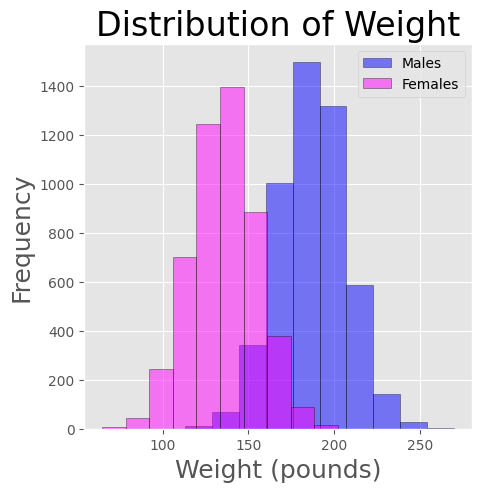

In [22]:
# histogram of the weight - males and females

df[df['Gender'] == 'Male'].Weight.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(2, 2))
df[df['Gender'] == 'Female'].Weight.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(5, 5))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18)

Observations
1. The previous plots show that both height and weight present a normal distribution for males and females.
2. Although the average of both distribution is larger for males, the spread of the distributions is similar for both genders.

###ANalyzing Gender column and checking statistical value

In [23]:
# Descriptive statistics male
statistics_male = df[df['Gender'] == 'Male'].describe()
# statistics_male.rename(columns=lambda x: x + '_male', inplace=True)
statistics_male.rename(columns = {"Height":"Height_male","Weight":"Weight_male"}, inplace = True)
statistics_male

,Height_male,Weight_male
count,5000.000000,5000.000000
mean,69.026346,187.020621
std,2.863362,19.781155
min,58.406905,112.902939
25%,67.174679,173.887767
50%,69.027709,187.033546
75%,70.988744,200.357802
max,78.998742,269.989699


In [24]:
# Descriptive statistics female
statistics_female = df[df['Gender'] == 'Female'].describe()
# statistics_female.rename(columns=lambda x: x + '_female', inplace=True)
statistics_female.rename(columns = {"Height":"Height_female","Weight":"Weight_female"}, inplace = True)

In [25]:
statistics_female

,Height_female,Weight_female
count,5000.000000,5000.000000
mean,63.708774,135.860093
std,2.696284,19.022468
min,54.263133,64.700127
25%,61.894441,122.934096
50%,63.730924,136.117583
75%,65.563565,148.810926
max,73.389586,202.237214


**Creating dataframe for concat above dataframes**

In [26]:
# Dataframe that contains statistics for both male and female
statistics = pd.concat([statistics_male, statistics_female], axis=1)
statistics

,Height_male,Weight_male,Height_female,Weight_female
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,69.026346,187.020621,63.708774,135.860093
std,2.863362,19.781155,2.696284,19.022468
min,58.406905,112.902939,54.263133,64.700127
25%,67.174679,173.887767,61.894441,122.934096
50%,69.027709,187.033546,63.730924,136.117583
75%,70.988744,200.357802,65.563565,148.810926
max,78.998742,269.989699,73.389586,202.237214


Observations
1. After performing the exploratory analysis, we can conclude that height and weight are normal distributed.
2. Males distributions present larger average values, but the spread of distributions compared to female distributions is really similar.

###Checking correlation

**Is there a relation between height and weight? Can we use the height of a person to predict his weight?**

Text(0, 0.5, 'Weight (pounds)')

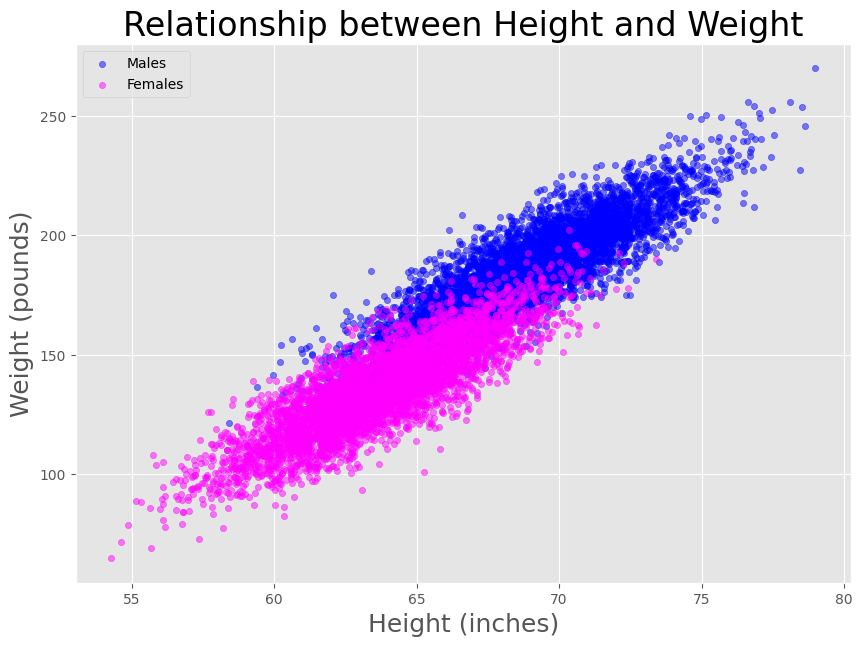

In [27]:
# Scatter plot of Height and Weight

ax1=df[df['Gender'] == 'Male'].plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)

<Axes: xlabel='Height', ylabel='Weight'>

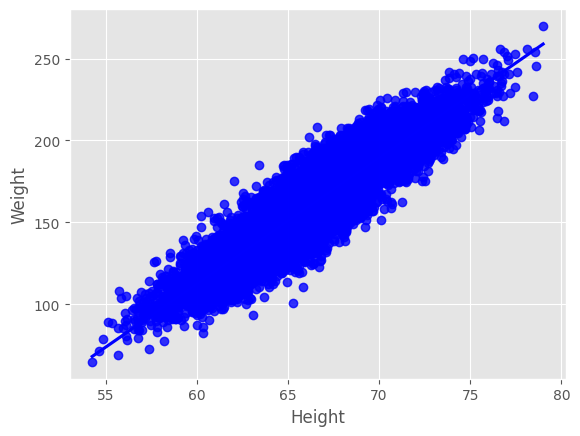

In [28]:
sns.regplot(x=df["Height"],y=df["Weight"],color="blue")

Observations;
1. The following plot shows the relation between height and weight for males and females.
2. The visualization contains 10000 observations that is why we observe overplotting. Overplotting occurs when the data overlap in a visualization, making difficult to visualize individual data points. In this case, the cause is the large number of data points (5000 males and 5000 females).
3.  Another reason can be a small number of unique values; for instance, when one of the variables of the scatter plot is a discrete variable.

To avoid this problem, we have randomly selected the height and weight of 500 women. This plot has not overplotting and we can better distinguish individual data points. As we can observe in previous plots, weight of males and females tents to go up as height goes up, showing in both cases a linear relation.

Text(0, 0.5, 'Weight (pounds)')

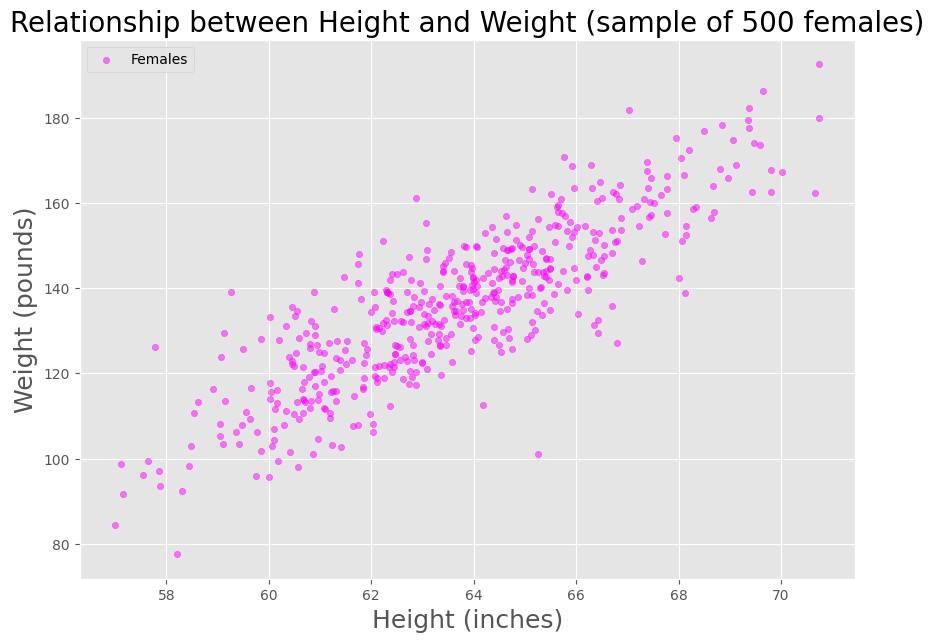

In [29]:
# Scatter plot of 500 females

sample_females = df[df['Gender'] == 'Female'].sample(500)
sample_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Females'])
plt.title('Relationship between Height and Weight (sample of 500 females)', size=20)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)

Text(0, 0.5, 'Weight (pounds)')

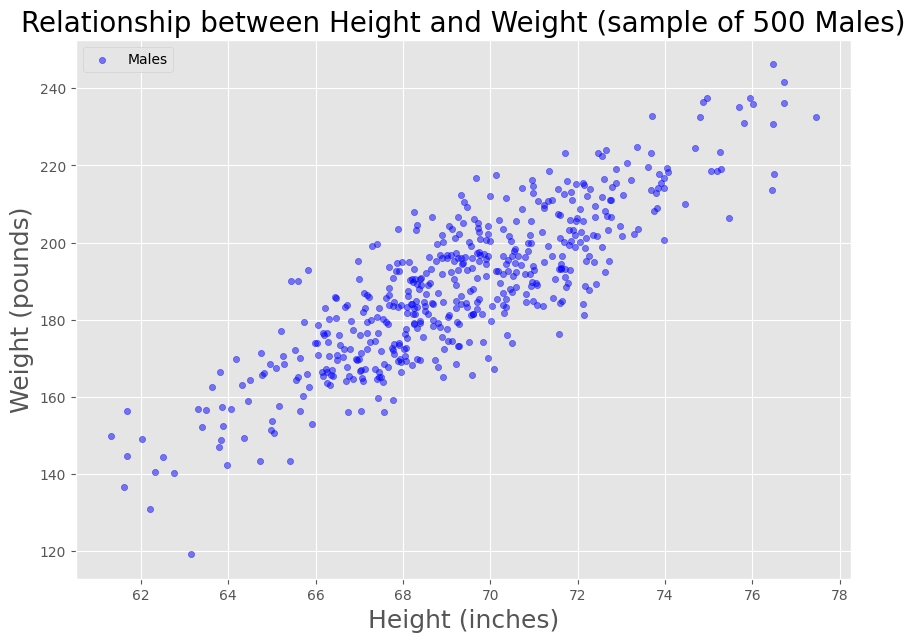

In [30]:
# Scatter plot of 500 females

sample_males = df[df['Gender'] == 'Male'].sample(500)
sample_males.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males'])
plt.title('Relationship between Height and Weight (sample of 500 Males)', size=20)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)

### Pearson correlation coefficient

Correlation measures the extent to which two variables are related. The Pearson correlation coefficient is used to measure the strength and direction of the linear relationship between two variables. This coefficient is calculated by dividing the covariance of the variables by the product of their standard deviations and has a value between +1 and -1, where 1 is a perfect positive linear correlation, 0 is no linear correlation, and −1 is a perfect negative linear correlation.

In [31]:
# dataframe containing only females
df_females = df[df['Gender'] == 'Female']

# correlation coefficients
df_females['Height'].corr(df_females['Weight'])

0.8496085914186009

In [32]:
# dataframe containing only males
df_males = df[df['Gender'] == 'Male']

# correlation coefficients
df_males['Height'].corr(df_males['Weight'])

0.8629788486163172

In above calculations, we have obtained a Pearson correlation coefficient larger than 0.8, meaning that height and weight are strongly correlated for both males and females.

# Fitting a simple linear model using sklearn

### Linear Model only on the data of Male

#### Split the dataset

When performing any type of machine learning, good data preparation is required to ensure good model performance. Poor data preparation is often the source of poor machine learning model performance.

The first step in preparing these data is to create **independently sampled** **training dataset** and **test data set**. In most cases, an independently sampled **evaluation (validation) dataset** will also be used. In this case, no model improvement or comparison will be performed so this additional step is unnecessary.

If the same data are used to train and test a machine learning model, there is a high likelihood that the model will simply be learning the training data. In technical terms one can say that there is **information leakage** between the training and test processes. In this case, the model may not **generalize** well. A model that generalizes well produces consistent results when presented with new cases, never before encountered. Conversely, a model with poor generalization might give unexpected results when presented with a new case.

The random sub-samples of the data are created using a process called **Bernoulli sampling**. Bernoulli sampling accepts a sample into the data subset with probability $p$. In this case, the probability that a given case is in the training dataset is $p$. The probability a case is in the test dataset then becomes $1-p$.

The `train_test_split` function from the `sklearn.model_selection` module performed the required Bernoulli sampling. The `train_test_split` function samples the index for the array containing the features and label values.

In [33]:
df_males = df[df['Gender'] == 'Male']

X = df_males[['Height']]
y = df_males[['Weight']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

#random_state  - Controls the shuffling applied to the data before applying the split.
                #Pass an int for reproducible output across multiple function calls.

**Check the size and shape of train/test splits (it should be in the ratio as per test_size parameter above)**

In [34]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (4000, 1)
Test feature set size: (1000, 1)
Training variable set size: (4000, 1)
Test variable set size: (1000, 1)


Observations
1. Split the data for male category in 70 % and 30 %
2. 70% of data will use for trian the model while 30 % will be for testing purpose

In [35]:
# create linear regression object
lr_males = LinearRegression()

# fit linear regression
lr_males.fit(X_train, y_train)


LinearRegression()

In [36]:
# get the slope and intercept of the line best fit
print("intercept",lr_males.intercept_)

print("coeficient",lr_males.coef_)

intercept [-226.84743593]
coeficient [[5.99492009]]


### Prediction

**Prediction using the lr_males model**

In [37]:
predictions = lr_males.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1000, 1)


In [38]:
predictions.shape

(1000, 1)

**Visualize**

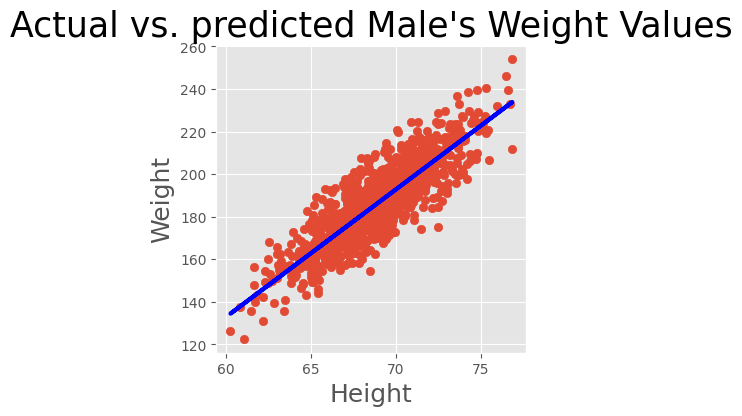

In [39]:
# Plot outputs

plt.figure(figsize=(4,4))
plt.title("Actual vs. predicted Male's Weight Values",fontsize=25)
plt.xlabel("Height",fontsize=18)
plt.ylabel("Weight", fontsize=18)
plt.scatter(x=X_test,y=y_test)
plt.plot(X_test, predictions, color='blue', linewidth=3)

The blue line appears to be a good fit to the data. The errors between the scored values and the residuals appear to be minimal. However, an objective evaluation of model performance is require.

**Regression evaluation metrices**

In [108]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 7.895192620445001
Mean square error (MSE): 98.35736612030132
Root mean square error (RMSE): 9.917528226342556


**R-square value**

In [41]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

R-squared value of predictions: 0.727


$R^2$ is moderately good and fairly close to one, indicating that the model is making useful predictions.

**Cross check first few Actual values and Predicted Values**

In [42]:
df_check = pd.DataFrame({'Actual': y_test['Weight'][:10].values, 'Predicted': predictions[:10].ravel()})
df_check

,Actual,Predicted
0,156.869952,165.813806
1,154.503178,166.664184
2,210.964441,206.785973
3,183.852038,186.984844
4,182.904304,193.918143
5,159.319115,167.824650
6,216.923291,201.225617
7,162.429727,152.010714
8,162.690594,150.907139
9,190.185147,188.677913


The residuals of a linear regression model should have an approximately Normal distribution. This condition can be easily tested using graphical methods, specifically a histogram.

**Note:** A common misconception is that the features or label of a linear regression model must have Normal distributions. This is not the case! Rather, the residuals (errors) of the model should be Normally distributed.   

Text(14.27372222222222, 0.5, 'count')

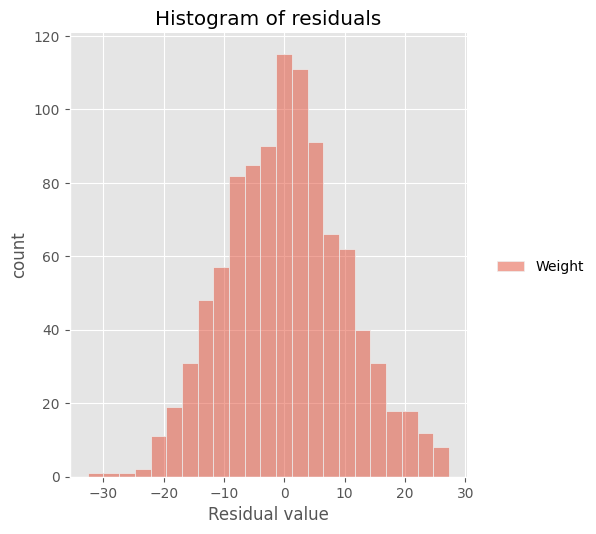

In [52]:
 ## first compute vector of residuals.
resids = np.subtract(y_test, predictions)
## now make the residual plots
sns.displot(resids)
plt.title('Histogram of residuals')
plt.xlabel('Residual value')
plt.ylabel('count')

In [44]:
X_test.shape

height_of_dsbatch_79 = [68.4,70,60,72,69]
height_of_dsbatch_79_arr = np.array([height_of_dsbatch_79]).reshape(5,1)
height_of_dsbatch_79_arr

array([[68.4],
       [70. ],
       [60. ],
       [72. ],
       [69. ]])

In [45]:
lr_males.predict(height_of_dsbatch_79_arr)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[183.20509852],
       [192.79697067],
       [132.84776973],
       [204.78681086],
       [186.80205058]])

This histogram and the kernel density plot look approximately Normal, with little deviations. Overall, these residuals look reasonable for a real-world model.  

## Summary

In this lab we have performed a complete machine learning process for a simple linear regression model. The same steps are followed for creating and testing any machine learning model. The steps in this process include:

1. Used weight-height dataset. Detailed data exploration has been performed.
2. Prepared the data. The dataset divided diveded into to sets using the categorical column Gender. After that data preparation done by splitting the data into training and test subset.
3. Constructed the regression model using training data with scikit-learn.
4. Evaluated the results of the model using the test data. In this case the residuals were found to be reasonably small and well behaved.

In [46]:
# Assignment

### Linear Model only on the data of Female

In [82]:
#Creating dataframe for female
df_female=df[df["Gender"]=="Female"]

In [88]:
#Setting the in-dependent and dependent vriable
x_f=df_females[["Height"]]
y_f=df_female[["Weight"]]

In [90]:
x_train_f,x_test_f,y_train_f,y_test_f=train_test_split(x_f,y_f,test_size=0.3,random_state=123)

In [91]:
print("training feature set size",x_train_f.shape)
print("training variable set size",y_train_f.shape)
print("testing feature set size",x_test_f.shape)
print("testing variable set size",x_test_f.shape)

training feature set size (3500, 1)
training variable set size (3500, 1)
testing feature set size (1500, 1)
testing variable set size (1500, 1)


Observations
1. Split the data for female category in 70 % and 30 %
2. 70% of data will use for trian the model while 30 % will be for testing purpose

In [92]:
#Creating linear regression model for females
lr_female=LinearRegression()

In [93]:
#Fit in lr
lr_female.fit(x_train_f,y_train_f)

LinearRegression()

In [94]:
print("intercept",lr_males.intercept_)

print("coeficient",lr_males.coef_)

intercept [-226.84743593]
coeficient [[5.99492009]]


In [95]:
#Finding intercept
lr_female.intercept_

array([-245.86133161])

In [96]:
#finding coff. or slope
lr_female.coef_

array([[5.99135864]])

###Prediction for females by model for test data

In [99]:
#Predicting out test data
prediction_f=lr_female.predict(x_test_f)

In [100]:
#Checking shape of prediction
prediction_f.shape

(1500, 1)

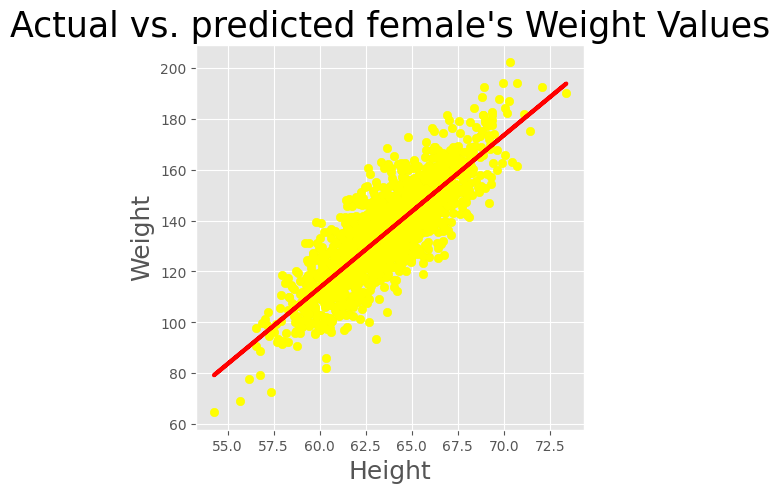

In [106]:
#Visualiing
plt.figure(figsize=(5,5))
plt.title("Actual vs. predicted female's Weight Values",fontsize=25)
plt.xlabel("Height",size=18)
plt.ylabel("Weight", size=18)
plt.scatter(x=x_test_f,y=y_test_f,color="yellow")
plt.plot(x_test_f,prediction_f,color="red",linewidth=3)

Observations
1. The red line appears to be a good fit to the female data also. The errors between the scored values and the residuals appear to be minimal.

###**Evaluation of Regression metrices**

In [107]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test_f,prediction_f))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test_f,prediction_f))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test_f,prediction_f)))

Mean absolute error (MAE): 8.2059931179741
Mean square error (MSE): 105.95750379593149
Root mean square error (RMSE): 10.293566135986667


**R squre value**

In [113]:
#Finding R^2 value
print("R-squared value of predictions:",round(metrics.r2_score(y_test_f,prediction_f),4))

R-squared value of predictions: 0.7041


Observations
1. R-Squere value is near to 1 so out model is very fit for prediction

###Comparing actual value with predicted value

In [114]:
df_check_f = pd.DataFrame({'Actual': y_test_f['Weight'][:15].values, 'Predicted': prediction_f[:15].ravel()})
df_check_f

,Actual,Predicted
0,161.063686,152.470114
1,125.441176,130.514333
2,138.982098,146.474438
3,121.339602,124.455162
4,161.363484,177.788474
5,119.066227,135.972357
6,140.266700,145.442294
7,125.143641,125.987059
8,124.900181,139.115151
9,152.828706,142.372484


Observations
1. So compare the predicted values with actual values for 15 rows and it is quite close means our model is working good.

**Checking residuals are well distributed or not**

In [118]:
 #computing vector of residuals.
residuals = np.subtract(y_test_f, prediction_f)
residuals[:10]

,Weight
7648,8.593572
7456,-5.073157
9557,-7.492340
9884,-3.115560
5092,-16.424989
9038,-16.906130
5030,-5.175594
6746,-0.843418
6692,-14.214970
7277,10.456221


Text(14.27372222222222, 0.5, 'count')

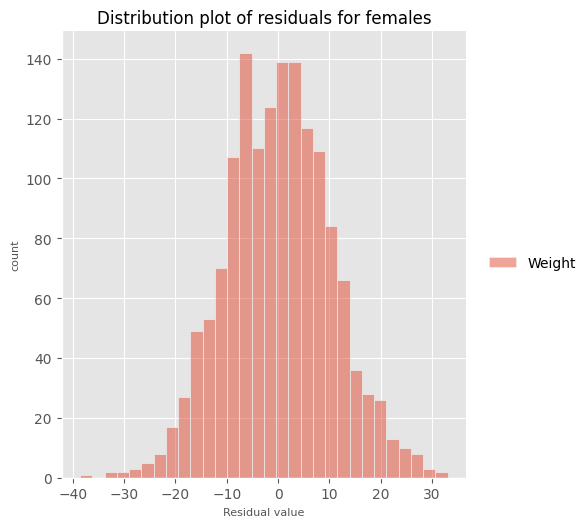

In [123]:
#We need to substract to actual value with predicted value
## now make the residual plots
sns.displot(residuals)
plt.title('Distribution plot of residuals for females',size=12)
plt.xlabel('Residual value',size=8)
plt.ylabel('count',size=8)

Observations
1. The residuals of a linear regression model  have an approximately Normal distribution which is good.
2. And also checked for first 10 rows of resuals it is nearly close for every datapoint

**Now our model is ready for further work and predictions**